# The Efficient Frontier

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
import kit as erk

In [2]:
ind = pd.read_csv("../data/ind30_m_vw_rets.csv", header= 0, index_col= 0)

ind = ind / 100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

ind.columns = ind.columns.str.strip() #Clean columns (headers)

print(ind.shape)
ind.head()

(1110, 30)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


For future uses of this DataSet; the previous code will be added to the Functions Kit.

#### Portfolio Return
Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but for the moment, assume that the naive method of estimating these parameters will suffice.

In [3]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

#### Portfolio Volatility

In [4]:
def portfolio_vol(weights, covmat):
    """
    Computes the volatility of a portfolio from a covariance matrix and constituent weights.
    Weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

#### Covariance Matrix

In [11]:
cov = ind["1996":"2000"].cov() # Pandas method
cov.head(5)  

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442


## 2-Asset Case

In the case of 2 assets, the problem is somewhat simplified, since the $w$ of the second asset is $1-w$ of the first asset.

In [6]:
def plot_ef2(n_points, expected_returns, cov, style = '.'):
    """
    Plots the 2-asset efficient frontier
    """
    if expected_returns.shape[0] != 2 : raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    

    weights = [[w, 1-w] for w in np.linspace(0, 1, n_points)]

    rets = [portfolio_return(w, expected_returns) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]

    ef = pd.DataFrame({ "Returns": rets, "Volatility": vols })

    return ef.plot.line(x="Volatility", y="Returns", style= style)

<Axes: xlabel='Volatility'>

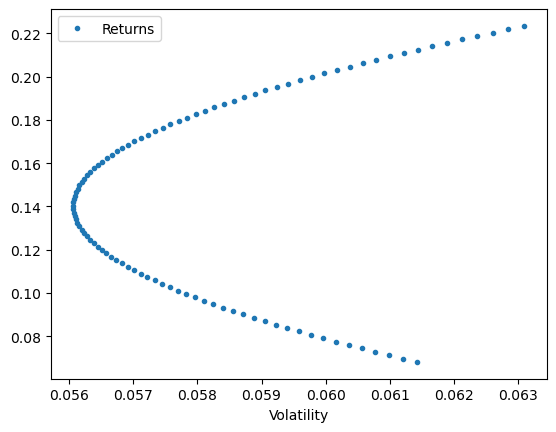

In [7]:
assets = ["Games", "Fin"]
er = erk.annualize_rets(ind["1996":"2000"], 12)


erk.plot_ef2( 100, er[assets].values, cov.loc[assets, assets] )

In [13]:
er.head(5)

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
dtype: float64

## Multiple Asset Case

In order to plot the frontier for portfolios with more than 2 assets, we need to find the weights of the portfolio on the efficient frontier. 

In order to find the optimal weights, we need a function that will minimize the volatility for a given level of return.

In [8]:
from scipy.optimize import minimize
def minimize_vol(target_return, expected_returns, cov):
    """
    Returns the optimal weights that achieve the target_return.
        Given a set of expected_returns and a covariance_matrix.

    weights : x   Optimization target parameter
    """

    # Initial values
    n = expected_returns.shape[0]
    init_guess = np.repeat(1/n, n)

    # Frontier values
    bounds = ((0, 1),) * n


    # Constraints   |   weights : x   target

    weights_sum_to_1 = {'type': 'eq', # Check when Constrain Function [fun] equals 0
                        
                        # The funtion is 0 only when Σ(w) == 1  , So, only when x is equal to 1
                        'fun': lambda weights: np.sum(weights) - 1 }
    
    return_is_target = {'type': 'eq',
                        'args': (expected_returns,), # Additional parameter in 'fun' other than x

                        # So, return(x, expected_returns) equals target_return
                        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er) }
    

    # Optimization Function
    weights = minimize(erk.portfolio_vol, # Objective Function
                       init_guess, # Initial values
                       args=(cov,), # Extra arguments [ portfolio_vol(x, cov) ]
                       method='SLSQP', # Quadratic Optimizer

                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds
                    )
    

    return weights.x # Return only the target parameter value

Then we can plot the efficient frontier by dividing up the range from the highest to the lowest possible return into a grid, and finding the portfolio that targets the minimum volatility given a particular targeted rate of return.

In [9]:
def plot_ef(n, expected_returns, cov):
    """
    Plots the multi-asset efficient frontier
    """
    def optimal_weights(n, expected_returns, cov):
        ''' Volatility Optimization implementation'''
        targets = np.linspace(expected_returns.min(), expected_returns.max(), n)
        weights = [minimize_vol(t, expected_returns, cov) for t in targets]

        return weights

    weights = optimal_weights(n, expected_returns, cov)
    rets = [portfolio_return(w, expected_returns) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]

    ef = pd.DataFrame( {"Returns": rets, "Volatility": vols} )
    ax = ef.plot.line(x="Volatility", y="Returns", style='.')

    return ax

<Axes: xlabel='Volatility'>

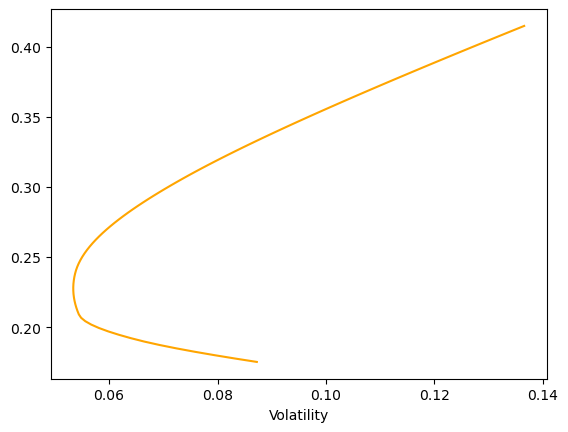

In [10]:
assets = ["Rtail", "Fin", "Servs", "Coal"]
erk.plot_ef(100, er[assets], cov.loc[assets, assets])